In [39]:
#라이브러리 추가하기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [40]:
# 예제 3-39 webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('/usr/local/bin/chromedriver')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

/var/folders/fx/xwm3xmr10474257ckhl47glw0000gn/T/ipykernel_8052/4136826119.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('/usr/local/bin/chromedriver')


In [41]:
# 예제 3-40 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="https://youtube-rank.com/css/default.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/bootstrap.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/nifty.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/themes/type-c/theme-well-red.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?191202" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch

In [42]:
# 예제 3-41 BeautifulSoup으로 tr 태그 추출하기
# 예제 3-42 tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [43]:
# 예제3-43채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)



<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLS48A09N2xyM8i9JeIfYCWsd-13csflXwYa8XAmoA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="/img/img_bg.png" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="fa fa-comment"></i>
								1							</span>
<i aria-hidden="true" class="fa fa-heart">

In [44]:
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [45]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [46]:
# 예제 3-46 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7000만
213억3965만
395개


In [47]:
# 예제 3-47 반복문으로 채널 정보 추출하기
result = []
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)
    data = [title,category,subscriber,view,video]
    result.append(data)

BLACKPINK [음악/댄스/가수] 7000만 213억3965만 395개
HYBE LABELS [음악/댄스/가수] 6290만 203억9998만 724개
BANGTANTV [음악/댄스/가수] 6120만 139억6260만 1,639개
SMTOWN [음악/댄스/가수] 2920만 229억3891만 3,776개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2450만 69억1577만 3,377개
1theK (원더케이) [음악/댄스/가수] 2370만 213억1806만 15,610개
JYP Entertainment [음악/댄스/가수] 2290만 149억0315만 1,426개
Mnet K-POP [음악/댄스/가수] 1890만 139억3428만 26,806개
JFlaMusic [음악/댄스/가수] 1730만 34억9690만 280개
KBS WORLD TV [TV/방송] 1720만 128억7162만 53,997개
Jane ASMR 제인 [음식/요리/레시피] 1550만 54억8564만 1,293개
officialpsy [음악/댄스/가수] 1530만 88억3047만 91개
AdeleVEVO [미분류] 1520만 104억3527만 48개
BIGBANG [음악/댄스/가수] 1390만 68억2632만 773개
TWICE [음악/댄스/가수] 1250만 26억5461만 697개
Saturday Night Live [미분류] 1240만 125억3402만 7,777개
Hongyu ASMR 홍유 [음식/요리/레시피] 1080만 31억0925만 419개
Nao FunFun [키즈/어린이] 1070만 445만 37개
Stone Music Entertainment [음악/댄스/가수] 1010만 82억1795만 8,304개
DuDuPopTOY [키즈/어린이] 1010만 45억1484만 1,901개
핑크퐁 (인기 동요・동화) [키즈/어린이] 990만 59억8068만 2,375개
MBCkpo

IndexError: list index out of range

In [ ]:
# 데이터 컬럼명 설정하고 엑셀파일로 저장
df = pd.DataFrame(result)
df.columns = ['title','category','subscriber','view','video']
df.to_excel('./files/youtube_rank.xlsx',index = False)

# 랭킹 데이터 시각화 하기

In [48]:
# 예제 3-53 엑셀 파일 불러오기
df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7000만,213억3965만,395개
1,HYBE LABELS,[음악/댄스/가수],6290만,203억9998만,724개
2,BANGTANTV,[음악/댄스/가수],6120만,139억6260만,"1,639개"
3,SMTOWN,[음악/댄스/가수],2920만,229억3891만,"3,776개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [49]:
df['replaced_subscriber']= df['subscriber'].str.replace('만','0000')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                100 non-null    object
 1   category             100 non-null    object
 2   subscriber           100 non-null    object
 3   view                 100 non-null    object
 4   video                100 non-null    object
 5   replaced_subscriber  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [51]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7000만,213억3965만,395개,70000000
1,HYBE LABELS,[음악/댄스/가수],6290만,203억9998만,724개,62900000
2,BANGTANTV,[음악/댄스/가수],6120만,139억6260만,"1,639개",61200000
3,SMTOWN,[음악/댄스/가수],2920만,229억3891만,"3,776개",29200000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000
...,...,...,...,...,...,...
95,로미유 스토리[Romiyu Story],[키즈/어린이],416만,10억9277만,434개,4160000
96,[Dorothy]도로시,[음식/요리/레시피],416만,9억9756만,905개,4160000
97,JaeYeol ASMR 재열,[취미/라이프],397만,10억9310만,"1,015개",3970000
98,CoCosToy 꼬꼬스토이,[키즈/어린이],387만,21억7939만,657개,3870000


In [52]:
# 피봇 테이블 생성

pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],13450000,3
[TV/방송],82560000,12
[게임],4250000,1
[뉴스/정치/사회],20220000,3
[미분류],40680000,4
[애완/반려동물],4240000,1
[음식/요리/레시피],90450000,14
[음악/댄스/가수],523020000,36


In [53]:
# 컬렴명칭 변경
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],13450000,3
[TV/방송],82560000,12
[게임],4250000,1
[뉴스/정치/사회],20220000,3
[미분류],40680000,4


In [54]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],13450000,3
1,[TV/방송],82560000,12
2,[게임],4250000,1
3,[뉴스/정치/사회],20220000,3
4,[미분류],40680000,4


In [56]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

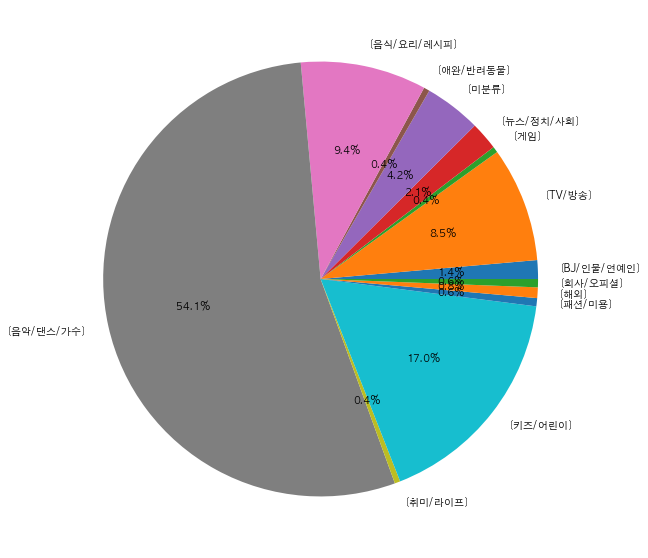

In [57]:
# 카테고리별 구독자수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels = pivot_df['category'], autopct = '%1.1f%%')
#autopct -> 그래프에 나타날 숫자의 형식
plt.show()


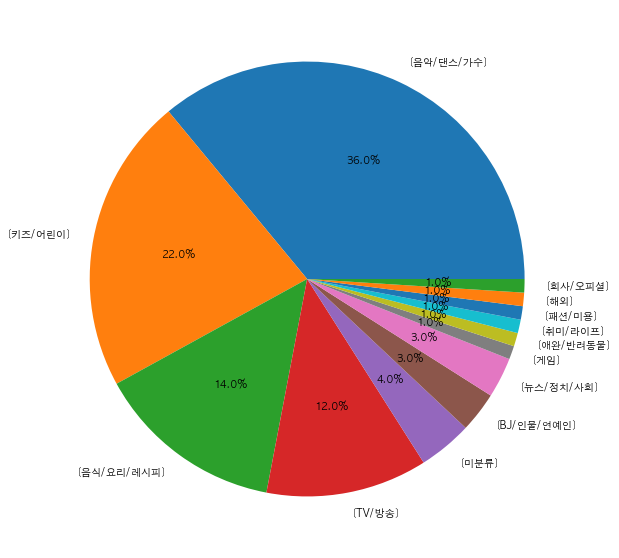

In [58]:
# 예제 3-65 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()